In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(reshape2))

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”


In [2]:
df <- readRDS('../Data/Full_data.rds') %>% mutate(chunk=as.POSIXct(chunk, tz = "GMT", origin="1970-01-01")) %>% select(chunk, texts, abnormal)
df <- df %>% filter(chunk >= '2022-04-01 00:00:00')
df <- tail(df, n=1578)

In [3]:
RNN_preds <- read.csv('../Data/RNN_preds_full.csv') %>% select(RNN_preds = preds, cutoff, abnormal_cutoff_truth, RNN_abnormal_preds = abnormal_preds, RNN_abnormal_preds_truth = abnormal_preds_truth)
ARIMA_preds <- tail(read.csv('../Data/ARIMA_preds_full.csv'), n=1578) %>% select(ARIMA_preds = preds, ARIMA_abnormal_preds = abnormal_preds, ARIMA_abnormal_preds_truth = abnormal_preds_actual)

In [4]:
df <- cbind(df, RNN_preds, ARIMA_preds)
df$abnormal_Q1_22 <- ifelse(df$texts >= df$cutoff, 1, 0)

In [5]:
df$abnormal_plot_Q1_22 <- ifelse(df$abnormal_Q1_22 == 1, df$texts, NA)
df$abnormal_ARIMA_plot <- ifelse(df$ARIMA_abnormal_preds == 1, df$ARIMA_preds, NA)

df$abnormal_plot <- ifelse(df$abnormal == 1, df$texts, NA)
df$abnormal_RNN_plot_truth <- ifelse(df$RNN_abnormal_preds_truth == 1, df$RNN_preds, NA)
df$abnormal_ARIMA_plot_truth <- ifelse(df$ARIMA_abnormal_preds_truth == 1, df$ARIMA_preds, NA)

In [6]:
sum(df$ARIMA_abnormal_preds_truth)

[1] 485

In [7]:
str(df)

'data.frame':	1578 obs. of  17 variables:
 $ chunk                     : POSIXct, format: "2022-04-02 03:00:00" "2022-04-02 04:00:00" ...
 $ texts                     : int  19 27 17 21 16 25 34 29 48 52 ...
 $ abnormal                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ RNN_preds                 : num  36.4 24.3 19.7 19.2 21.2 ...
 $ cutoff                    : num  79.5 69.6 40.7 35.4 44.3 ...
 $ abnormal_cutoff_truth     : num  54.5 42.5 29.7 28.7 37.2 ...
 $ RNN_abnormal_preds        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ RNN_abnormal_preds_truth  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ARIMA_preds               : num  47.5 28.8 18.5 17.5 23.4 ...
 $ ARIMA_abnormal_preds      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ARIMA_abnormal_preds_truth: int  0 0 0 0 0 0 0 0 1 1 ...
 $ abnormal_Q1_22            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ abnormal_plot_Q1_22       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ abnormal_ARIMA_plot       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ abnormal_plot             : i

In [16]:
sum(is.na(df$RNN_preds))

[1] 0

In [8]:
head(df)

,chunk,texts,abnormal,RNN_preds,cutoff,abnormal_cutoff_truth,RNN_abnormal_preds,RNN_abnormal_preds_truth,ARIMA_preds,ARIMA_abnormal_preds,ARIMA_abnormal_preds_truth,abnormal_Q1_22,abnormal_plot_Q1_22,abnormal_ARIMA_plot,abnormal_plot,abnormal_RNN_plot_truth,abnormal_ARIMA_plot_truth
,<dttm>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
28,2022-04-02 03:00:00,19,0,36.35479,79.54032,54.54314,0,0,47.48194,0,0,0,NA,NA,NA,NA,NA
29,2022-04-02 04:00:00,27,0,24.26977,69.63662,42.50444,0,0,28.81841,0,0,0,NA,NA,NA,NA,NA
30,2022-04-02 05:00:00,17,0,19.71617,40.72426,29.72913,0,0,18.51295,0,0,0,NA,NA,NA,NA,NA
31,2022-04-02 06:00:00,21,0,19.17676,35.38491,28.66821,0,0,17.50293,0,0,0,NA,NA,NA,NA,NA
32,2022-04-02 07:00:00,16,0,21.16275,44.29230,37.15912,0,0,23.39933,0,0,0,NA,NA,NA,NA,NA
33,2022-04-02 08:00:00,25,0,24.65372,74.19635,41.72971,0,0,33.51862,0,0,0,NA,NA,NA,NA,NA


In [20]:
colors <- c("Truth" = "red", "ARIMA" = "green", "LSTM RNN" = "blue")

Warning message:
“Removed 1569 rows containing missing values (geom_point).”
Warning message:
“Removed 1573 rows containing missing values (geom_point).”
Warning message:
“Removed 1569 rows containing missing values (geom_point).”
Warning message:
“Removed 1573 rows containing missing values (geom_point).”


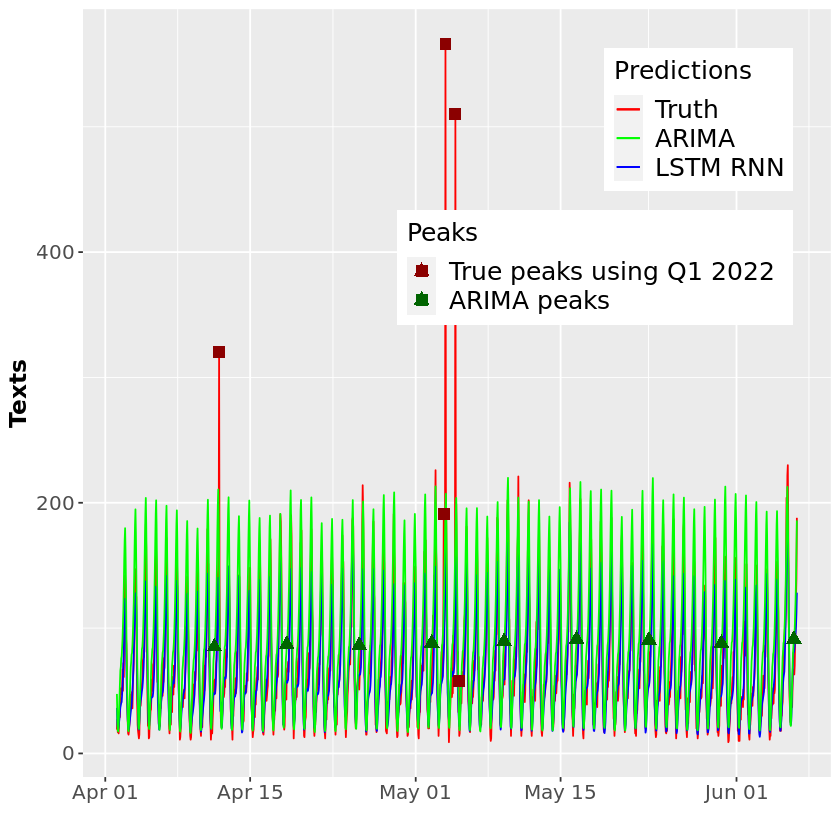

In [21]:
ggplot(df, aes(chunk)) + geom_line(aes(y=texts, color = "Truth")) + geom_line(aes(y=RNN_preds, color = "LSTM RNN")) + 
                        geom_line(aes(y=ARIMA_preds, color = "ARIMA")) + geom_point(aes(y=abnormal_ARIMA_plot, alpha = "ARIMA peaks"), colour = 'dark green', shape = 17, size = 3) + 
                        geom_point(aes(y=abnormal_plot_Q1_22, alpha = "True peaks using Q1 2022"), colour = 'dark red', shape = 15, size = 3) + 
                        theme(
                               legend.position = c(.95, .95),
                               legend.justification = c("right", "top"),
                               legend.box.just = "right",
                                legend.margin = margin(6, 6, 6, 6),
                            legend.title = element_text(size=15),
                            legend.text = element_text(size=15),
                            axis.text=element_text(size=12),
                            axis.title=element_text(size=14,face="bold")
                           ) +
                        labs(x= "", y = "Texts", color = "Legend") + scale_color_manual(name = "Predictions", values = colors) + 
                        scale_alpha_manual(name = "Peaks",
                        values = c(1, 1),
                        breaks = c("True peaks using Q1 2022", "ARIMA peaks"),
                        guide = guide_legend(override.aes = list(linetype = c(0, 0), color = c("dark red", "dark green"))))

ggsave("../Plots/model_predictions_Q1_22.pdf", height = 10, width = 20) 

Warning message:
“Removed 1093 rows containing missing values (geom_point).”
Warning message:
“Removed 1575 rows containing missing values (geom_point).”
Warning message:
“Removed 1569 rows containing missing values (geom_point).”
Warning message:
“Removed 1093 rows containing missing values (geom_point).”
Warning message:
“Removed 1575 rows containing missing values (geom_point).”
Warning message:
“Removed 1569 rows containing missing values (geom_point).”


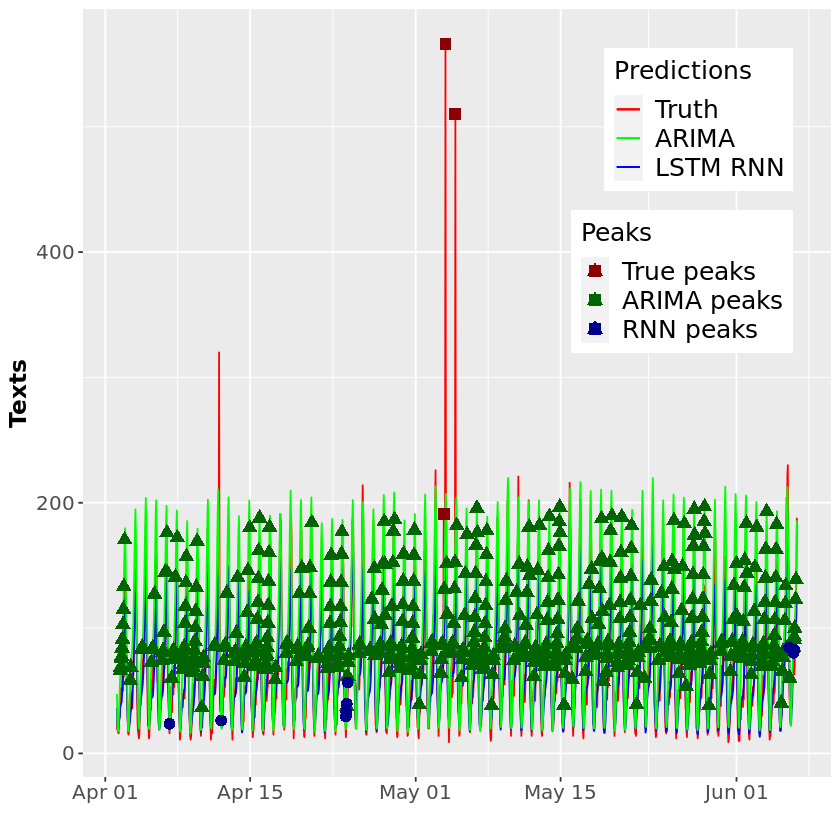

In [22]:
ggplot(df, aes(chunk)) + geom_line(aes(y=texts, color = "Truth")) + geom_line(aes(y=RNN_preds, color = "LSTM RNN")) + 
                        geom_line(aes(y=ARIMA_preds, color = "ARIMA")) + geom_point(aes(y=abnormal_ARIMA_plot_truth, alpha = "ARIMA peaks"), colour = 'dark green', shape = 17, size = 3) + 
                        geom_point(aes(y=abnormal_plot, alpha = "True peaks"), colour = 'dark red', shape = 15, size = 3) + 
                        geom_point(aes(y=abnormal_RNN_plot_truth, alpha = "RNN peaks"), colour = 'dark blue', shape = 16, size = 3) +
                        theme(
                               legend.position = c(.95, .95),
                               legend.justification = c("right", "top"),
                               legend.box.just = "right",
                                legend.margin = margin(6, 6, 6, 6),
                            legend.title = element_text(size=15),
                            legend.text = element_text(size=15),
                            axis.text=element_text(size=12),
                            axis.title=element_text(size=14,face="bold")
                           ) +
                        labs(x= "", y = "Texts", color = "Legend") + scale_color_manual(name = "Predictions", values = colors) + 
                        scale_alpha_manual(name = "Peaks",
                        values = c(1, 1, 1),
                        breaks = c("True peaks", "ARIMA peaks", "RNN peaks"),
                        guide = guide_legend(override.aes = list(linetype = c(0, 0, 0), color = c("dark red", "dark green", "dark blue"))))

ggsave("../Plots/model_predictions_truth.pdf", height = 10, width = 20) 

In [107]:
mean(df$texts)

[1] 72.15336